In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_drug_data, clinical_trial_data, how='left', on="Mouse ID", copy=False)


# Display the data table for preview
combined_data.tail()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1
1905,j235,Placebo,20,52.942902,1


## Tumor Response to Treatment

#### Set up Tumor Volume Mean

In [10]:
# Group Data by Drup and Timepoint
grouped_combined_data = combined_data.groupby(by=["Drug", "Timepoint"])

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = grouped_combined_data.mean().drop(columns="Metastatic Sites").reset_index()

# Convert to DataFrame
df_mean_tumor_vol = mean_tumor_vol.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)').drop(columns=["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"])

# Preview DataFrame
df_mean_tumor_vol
    

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


#### Set up Standard Error for Tumor Volume 

In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol = grouped_combined_data.sem().drop(columns="Metastatic Sites").reset_index()

# Convert to DataFrame
df_sem_tumor_vol = sem_tumor_vol.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)').drop(columns=["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"])

# Preview DataFrame
df_sem_tumor_vol


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


#### Plot Mean Tumor Volume 

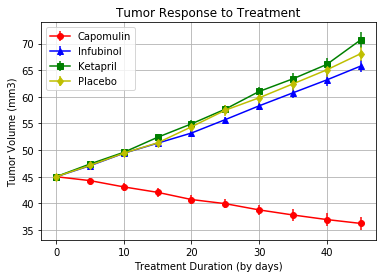

In [111]:
# Generate the Plot (with Error Bars)
x= df_mean_tumor_vol.index
y_C= df_mean_tumor_vol["Capomulin"]
error_C= df_sem_tumor_vol["Capomulin"]

y_I = df_mean_tumor_vol["Infubinol"]
error_I = df_sem_tumor_vol["Infubinol"]

y_K = df_mean_tumor_vol["Ketapril"]
error_K = df_sem_tumor_vol["Ketapril"]

y_P= df_mean_tumor_vol["Placebo"]
error_P= df_sem_tumor_vol["Placebo"]

plt.errorbar(x, y_C, yerr=error_C, fmt='-ro')
plt.errorbar(x, y_I, yerr=error_I, fmt='-b^')
plt.errorbar(x, y_K, yerr=error_K, fmt='-gs')
plt.errorbar(x, y_P, yerr=error_P, fmt='-yd')

plt.legend()
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Treatment Duration (by days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure
plt.savefig("Tumor_Response")


## Metastatic Response to Treatment

#### Set up Metastatic Sites Mean

In [62]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_tumor_meta = grouped_combined_data.mean().drop(columns="Tumor Volume (mm3)").reset_index()

# Convert to DataFrame
df_mean_tumor_meta = mean_tumor_meta.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites').drop(columns=["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"])

# Preview DataFrame
df_mean_tumor_meta


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


#### Set up Metastatic Sites Standard Error 

In [64]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_tumor_meta = grouped_combined_data.sem().drop(columns="Tumor Volume (mm3)").reset_index()

# Convert to DataFrame
df_sem_tumor_meta = sem_tumor_meta.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites').drop(columns=["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"])

# Preview DataFrame
df_sem_tumor_vol


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


#### Plot Metastatic Sites 

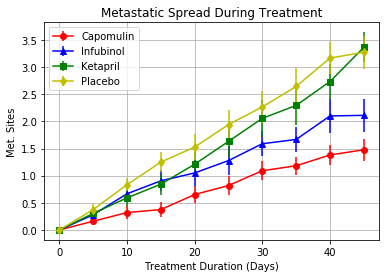

In [112]:
# Generate the Plot (with Error Bars)
x= df_mean_tumor_meta.index
y_C= df_mean_tumor_meta["Capomulin"]
error_C= df_sem_tumor_meta["Capomulin"]

y_I = df_mean_tumor_meta["Infubinol"]
error_I = df_sem_tumor_meta["Infubinol"]

y_K = df_mean_tumor_meta["Ketapril"]
error_K = df_sem_tumor_meta["Ketapril"]

y_P= df_mean_tumor_meta["Placebo"]
error_P= df_sem_tumor_meta["Placebo"]

plt.errorbar(x, y_C, yerr=error_C, fmt='-ro')
plt.errorbar(x, y_I, yerr=error_I, fmt='-b^')
plt.errorbar(x, y_K, yerr=error_K, fmt='-gs')
plt.errorbar(x, y_P, yerr=error_P, fmt='-yd')

plt.legend()
plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

# Save the Figure
plt.savefig("Tumor_Meta")


## Survival Rates

#### Set up Mouse Counts 

In [94]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mean_mice = grouped_combined_data["Mouse ID"].count()

# Data Munging to set up data for plotting
df_mean_mice = mean_mice.reset_index().pivot(index='Timepoint', columns='Drug', values='Mouse ID').drop(columns=["Ceftamin", "Naftisol", "Propriva","Ramicane", "Stelasyn", "Zoniferol"])

# Convert to Percentages
df_mean_mice = (100. * df_mean_mice / 25)

# Preview DataFrame
df_mean_mice.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


#### Plot Mouse Counts 

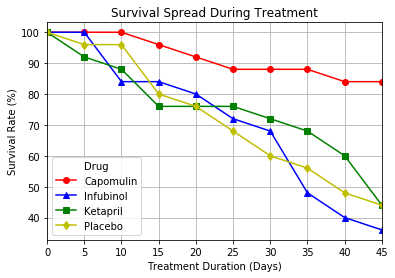

In [115]:
df_mean_mice.plot(style = ["-ro", "-b^", "-gs", "-yd"]) 

plt.grid()
plt.title("Survival Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")

plt.savefig("Survival_Rate")

## Summary Bar Graph

In [212]:
# Calculate the percent changes for each drug


# Display the data to confirm
combined_data.groupby(by="Drug")["Tumor Volume (mm3)"].pct_change()

0            NaN
1       0.051411
2       0.012488
3       0.017344
4       0.048784
5       0.020854
6       0.089984
7       0.015384
8      -0.220762
9       0.029502
10      0.012075
11      0.047625
12      0.026360
13      0.040008
14      0.036616
15      0.016363
16      0.026262
17      0.086924
18     -0.269713
19      0.031314
20      0.043592
21      0.073362
22      0.032546
23      0.019078
24      0.027418
25      0.019706
26      0.010818
27      0.037866
28     -0.251522
29      0.019675
          ...   
1876    0.047755
1877   -0.155773
1878    0.041398
1879    0.035256
1880    0.035113
1881   -0.103918
1882    0.082613
1883    0.018014
1884    0.085347
1885    0.059176
1886    0.054699
1887    0.080261
1888    0.024691
1889    0.045533
1890    0.016164
1891   -0.363666
1892    0.047036
1893    0.031353
1894    0.012838
1895    0.020566
1896    0.049438
1897    0.044069
1898    0.096257
1899    0.028181
1900    0.065486
1901   -0.319177
1902    0.035307
1903    0.0306

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

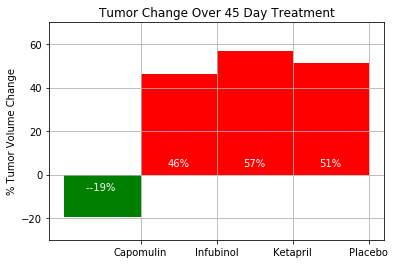